In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# read the dataset
df = pd.read_csv("Churn_ Data.csv")

In [3]:
# first 3 rows
df.head(3)

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4,14,39.29,57.32,-0.17,1,...,0.454642,0.497397,4,0,9,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1,2,21.67,38.70,-0.32,3,...,0.343190,0.767617,6,0,20,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2,3,30.00,15.32,-0.05,3,...,0.101838,0.619034,6,1,19,4.33,4.36,10.298451,0.699592,0.11


In [4]:
# last 3 rows
df.tail(3)

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
24997,0.01,148.8337,3.823940,4.334250,6,10,10.00,98.900,-0.03,2,...,0.327245,0.407944,3,0,12,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7,67,42.92,734.005,0.70,4,...,0.824671,0.889239,7,1,1,19.36,22.26,82.549378,0.952962,21.21
24999,-1.00,275.3530,5.134579,5.954062,1,1,53.50,250.340,-0.48,4,...,0.377281,0.609046,7,0,18,5.42,8.02,38.590040,1.000000,0.00


In [5]:
df.describe(include='all')

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-0.003730,281.073083,4.890003,7.070194,5.460080,28.532520,72.208906,218.517937,-0.028327,3.254720,...,0.538407,0.485523,5.731280,1.797320,8.382160,8.008660,12.540182,53.594165,0.483975,9.951366
std,2.727916,276.075983,4.212452,6.318992,2.184444,28.061435,67.921490,231.321064,0.354573,1.193271,...,0.209203,0.271146,1.936848,3.048943,8.961016,6.152429,11.540611,21.408486,0.292349,17.648128
min,-1.000000,0.000000,0.000000,0.000833,0.000000,0.000000,0.000000,0.000000,-5.090000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.580000,101.563800,2.367288,3.318825,5.000000,9.000000,33.000000,74.420000,-0.160000,3.000000,...,0.394227,0.274034,5.000000,0.000000,1.000000,4.207500,6.167500,39.378142,0.251304,1.970000
50%,-0.170000,204.859600,3.729944,5.231268,7.000000,21.000000,52.260000,151.168500,-0.020000,4.000000,...,0.539354,0.476759,7.000000,0.000000,5.000000,6.345000,9.350000,53.976203,0.477621,5.380000
75%,0.280000,370.711650,5.993342,8.395736,7.000000,39.000000,89.852500,284.265000,0.110000,4.000000,...,0.682695,0.694104,7.000000,2.000000,14.000000,9.830000,14.620000,68.312416,0.716538,11.400000
max,316.860000,5702.924300,153.221695,170.200441,7.000000,622.000000,2249.000000,3767.565000,5.000000,4.000000,...,1.000000,1.000000,7.000000,14.000000,30.000000,171.780000,386.480000,100.000000,1.000000,585.500000


### Data Preprocessing

In [6]:
# checking the dataset shape
df.shape

(25000, 111)

In [7]:
# Checking data types
df.dtypes.value_counts()

float64    80
int64      31
Name: count, dtype: int64

In [8]:
# checking the datatypes
df.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
                               ...   
s3.og.rev.all.m2              float64
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
Length: 111, dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 111 entries, s6.new.rev.p2.m2 to s3.rev.p1
dtypes: float64(80), int64(31)
memory usage: 21.2 MB


#### Checking & removing the duplicate records

In [10]:
duplicate_records = df.duplicated().sum()
duplicate_records

0

In [11]:
df.shape

(25000, 111)

#### Identifying & removing nonunique value variable

In [12]:
nonunique_value_columns = [columns for columns in df.columns if df[columns].nunique() == 1]
print("Columns with unique values:", nonunique_value_columns)

Columns with unique values: []


In [13]:
df.shape

(25000, 111)

#### Identifying columns with zero variance

In [14]:
zero_variance_columns = [columns for columns in df.columns if df[columns].var() == 0]
print("Columns with zero variance:", zero_variance_columns)

Columns with zero variance: []


In [15]:
df.shape

(25000, 111)

#### Outlier Treatment

#### Using Boxplot: Q3+(1.5 * IQR) & Q1-(1.5 * IQR)

In [16]:
df_copy = df.copy()
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtering out the outliers
outliers_removed = df_copy[~((df_copy < lower_bound) | (df_copy > upper_bound)).any(axis=1)]
# Print the results
print("Identified Outliers using IQR Method:")
print(outliers_removed.shape)

Identified Outliers using IQR Method:
(5032, 111)


In [17]:
df_copy = outliers_removed

In [18]:
df_copy.shape

(5032, 111)

In [19]:
df.shape

(25000, 111)

#### Standardization: ±3σ Approach

In [20]:
df_copy1 = df.copy()
mean = df_copy1.mean()
std = df_copy1.std()
# Filtering out the outliers
standardized_data = df_copy1[(df_copy1 - mean).abs() <= 3 * std].dropna()
print(f"Shape of data after standardization: {standardized_data.shape}")

Shape of data after standardization: (17612, 111)


In [21]:
df1_copy = standardized_data

In [22]:
df1_copy.shape

(17612, 111)

In [23]:
df.shape

(25000, 111)

#### Capping and flooring the outliers

In [24]:
lower_threshold = df.quantile(0.05)
upper_threshold = df.quantile(0.95)
capped_data = df.clip(lower = lower_threshold, upper= upper_threshold, axis=1)
print(f"Shape of data after capping and flooring: {capped_data.shape}")

Shape of data after capping and flooring: (25000, 111)


In [25]:
df = df1_copy.copy()

In [26]:
df.shape

(17612, 111)

#### Missing Values Treatement

In [27]:
# counting the missing value
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isnull().sum()

s6.new.rev.p2.m2              0
s1.new.rev.m1                 0
s3.og.rev.4db.p5              0
s3.new.rev.4db.p5             0
s4.usg.ins.p2                 0
s4.og.unq.any.p2              0
s2.rch.val.p6                 0
s1.og.rev.all.m1              0
s8.new.rev.p6                 0
s4.loc.ic.ins.p1              0
s8.mbl.p2                     0
s2.rch.val.l67                0
s7.s4.day.no.mou.p2.p4        0
s3.new.rev.p3                 0
s7.s5.s4.day.nomou.p4         0
s8.og.rev.p3                  0
s8.ic.mou.all.p3              0
target                        0
s7.new.rev.p2.p6              0
s6.rtd.mou.p2.m2              0
s7.rtd.mou.p2.p6              0
s1.new.rev.p2                 0
s1.new.rev.p1                 0
s1.og.hom.mou.p1              0
s7.rev.p2.p6                  0
s1.og.hom.rev.p2              0
s1.rtd.mou.p1                 0
s1.og.rev.all.p1              0
s1.og.mou.all.p1              0
s3.og.rev.all.p1              0
s7.new.rev.p3.p6              0
ds.usg.p

In [28]:
# Remove records if NA's are less than 5%
NA_records_removed = df.dropna(thresh=int(0.95 * df.shape[1]))
print(f"Shape of data after removing NA records: {NA_records_removed.shape}")

Shape of data after removing NA records: (17612, 111)


In [29]:
# Remove if NA's are 50% in any variable
na_columns_removed = df.dropna(thresh=int(0.5 * df.shape[0]), axis=1)
print(f"Shape of data after removing NA columns: {na_columns_removed.shape}")

Shape of data after removing NA columns: (17612, 111)


In [30]:
df.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                   int64
s4.og.unq.any.p2              float64
s2.rch.val.p6                 float64
s1.og.rev.all.m1              float64
s8.new.rev.p6                 float64
s4.loc.ic.ins.p1                int64
s8.mbl.p2                     float64
s2.rch.val.l67                float64
s7.s4.day.no.mou.p2.p4        float64
s3.new.rev.p3                 float64
s7.s5.s4.day.nomou.p4         float64
s8.og.rev.p3                  float64
s8.ic.mou.all.p3              float64
target                          int64
s7.new.rev.p2.p6              float64
s6.rtd.mou.p2.m2              float64
s7.rtd.mou.p2.p6              float64
s1.new.rev.p2                 float64
s1.new.rev.p1                 float64
s1.og.hom.mou.p1              float64
s7.rev.p2.p6                  float64
s1.og.hom.rev.p2              float64
s1.rtd.mou.p

In [31]:
# Impute with Mean/Median/Mode

for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].mean(), inplace=True)
    else:
        df[column].fillna(df[column].mode(), inplace=True)

print(f"Shape of data after imputation: {df.shape}")

Shape of data after imputation: (17612, 111)


#### Removing the highly correlated variable

In [32]:
# Creating a correlation matrix
corr_matrix = df.corr().abs()

# Selecting upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Finding features with correlation greater than 0.95
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]

# Dropping highly correlated features
df = df.drop(columns=high_corr_features)

print("Highly correlated features removed:", high_corr_features)

Highly correlated features removed: ['s7.new.rev.p2.p6', 's7.rtd.mou.p2.p6', 's1.rtd.mou.p1', 's1.og.mou.all.p1', 'snd.dec.p2', 'ds.og.usg.p4', 's1.og.hom.mou.p2', 's1.og.rev.all.p2', 's1.rtd.mou.p2', 's1.og.mou.any.p2', 's1.hom.rmg.rev.p2', 's5.og.mou.all.p1', 's5.og.hom.mou.p1', 's5.s4.day.no.mou.p2', 'tot.s4.day.no.mou.p2', 's5.new.rev.p1', 's4.low.blnc.ins.l14', 's3.og.hom.mou.p1', 's3.new.rev.p2', 's5.og.mou.all.p2', 's4.usg.ins.l14', 's3.rtd.mou.p1', 's7.s5.s4.day.nomou.p2', 's5.og.hom.mou.p2', 'prop.og.mou.tot.mou.all.p2', 's3.og.rev.3db.p5', 's8.rtd.mou.p6', 's4.low.blnc.ins.m2', 's4.low.blnc.ins.p4', 'prop.og.mou.any.p6', 's3.rev.p1']


In [33]:
print("Shape of data after removing highly correlated features:", df.shape)

Shape of data after removing highly correlated features: (17612, 80)


#### Multicollinearity ( VIF > 5 )

In [34]:
# Calculating VIF
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Filtering out features with VIF > 5
features_to_keep = vif_data[vif_data["VIF"] <= 15]["feature"]

df = df[features_to_keep]

print("Features with VIF > 5 removed:", vif_data[vif_data["VIF"] > 15]["feature"].tolist())
print("Shape of data after removing multicollinearity:", df.shape)

Features with VIF > 5 removed: ['s1.new.rev.m1', 's3.og.rev.4db.p5', 's3.new.rev.4db.p5', 's4.usg.ins.p2', 's4.og.unq.any.p2', 's2.rch.val.p6', 's1.og.rev.all.m1', 's8.new.rev.p6', 's4.loc.ic.ins.p1', 's2.rch.val.l67', 's3.new.rev.p3', 's1.new.rev.p2', 's1.new.rev.p1', 's1.og.hom.mou.p1', 's7.rev.p2.p6', 's1.og.hom.rev.p2', 's1.og.rev.all.p1', 's3.og.rev.all.p1', 's7.new.rev.p3.p6', 's3.og.mou.all.p1', 's1.og.mou.all.p2', 's5.og.rev.all.p1', 's5.rtd.mou.p1', 's7.rtd.mou.p3.p6', 's3.new.rev.p1', 's4.usg.ins.p1', 's2.s4.day.no.mou.p2', 's7.new.rev.l21.p6', 's5.rev.p1', 's3.og.mou.all.p2', 's1.rev.p1', 's4.loc.og.ins.p1', 's1.loc.og.mou.p1', 's4.og.any.p2', 'prop.og.mou.any.p2', 's4.low.blnc.ins.p3', 's1.loc.og.mou.p2', 's5.new.rev.p2', 's7.rtd.mou.l21.p6', 's4.loc.og.ins.l14', 's4.dec.ins.l14', 's2.s4.day.no.mou.p3', 'tot.s4.day.no.mou.p3', 's4.loc.ic.ins.l14', 's4.loc.og.ins.p2', 's5.rev.p2', 's1.new.rev.m2', 's4.loc.ins.l14', 'prop.loc.i2i.mou.og.mou.p6', 's4.dec.ins.p2', 's1.rev.p2', 

In [35]:
df.shape

(17612, 23)

In [36]:
df.corr()

,s6.new.rev.p2.m2,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s6.rtd.mou.p2.m2,ds.usg.p6,s8.og.rev.p6,s4.day.no.mou.p2,s8.new.rev.p3,s8.rtd.mou.p3,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.data.ins.l14,s4.std.ic.ins.l14
s6.new.rev.p2.m2,1.000000,-0.001125,0.034733,-0.047216,0.500939,0.153703,-0.415092,0.800169,-0.361093,0.510732,-0.304105,0.544879,0.411717,0.379134,0.092816,0.443397,-0.171433,0.378839,0.043249,-0.217638,-0.080305,-0.020522,0.026981
s8.mbl.p2,-0.001125,1.000000,-0.028896,0.025826,-0.027382,0.015460,-0.020468,-0.070041,0.000901,-0.015761,0.054315,0.035192,-0.016833,-0.009574,-0.000170,-0.032927,0.035622,0.303499,-0.013975,0.087749,0.050072,-0.021719,-0.007949
s7.s4.day.no.mou.p2.p4,0.034733,-0.028896,1.000000,-0.500042,0.023400,0.011849,-0.154613,0.038181,-0.207521,0.012464,-0.336264,0.015020,0.016796,0.026522,-0.007401,0.011189,-0.406962,0.241749,0.092401,-0.221378,-0.252397,0.045328,0.074803
s7.s5.s4.day.nomou.p4,-0.047216,0.025826,-0.500042,1.000000,-0.044613,-0.026686,0.169417,-0.040816,0.309792,-0.032695,0.448296,-0.042208,-0.051909,-0.033991,-0.024411,-0.028983,0.652180,-0.147070,-0.064941,0.301363,0.348207,-0.019029,-0.047883
s8.og.rev.p3,0.500939,-0.027382,0.023400,-0.044613,1.000000,0.216017,-0.271580,0.475967,-0.201881,0.149030,-0.172273,0.868655,0.770311,0.111271,0.123278,0.109611,-0.073564,0.180925,-0.017338,-0.142111,-0.036628,-0.032848,-0.019570
s8.ic.mou.all.p3,0.153703,0.015460,0.011849,-0.026686,0.216017,1.000000,-0.098648,0.158842,-0.100579,0.053335,-0.089895,0.205643,0.205384,0.051112,0.049270,0.061024,-0.049887,0.069630,-0.008067,-0.046545,-0.023593,-0.014206,-0.011457
target,-0.415092,-0.020468,-0.154613,0.169417,-0.271580,-0.098648,1.000000,-0.378235,0.307749,-0.276945,0.282766,-0.276158,-0.246190,-0.230881,-0.145038,-0.227344,0.227531,-0.198799,-0.000816,0.204966,0.140219,0.005762,0.003635
s6.rtd.mou.p2.m2,0.800169,-0.070041,0.038181,-0.040816,0.475967,0.158842,-0.378235,1.000000,-0.366147,0.504317,-0.356199,0.401361,0.500720,0.516904,0.096436,0.421648,-0.214245,0.261537,0.048155,-0.230577,-0.051029,-0.016803,0.026442
ds.usg.p6,-0.361093,0.000901,-0.207521,0.309792,-0.201881,-0.100579,0.307749,-0.366147,1.000000,-0.181079,0.532733,-0.199887,-0.195549,-0.197450,-0.036842,-0.170654,0.448690,-0.229601,-0.071853,0.439462,0.276281,-0.004004,-0.052574
s8.og.rev.p6,0.510732,-0.015761,0.012464,-0.032695,0.149030,0.053335,-0.276945,0.504317,-0.181079,1.000000,-0.179989,0.124252,0.115920,0.741224,-0.056231,0.767960,-0.159582,0.183791,0.049689,-0.128446,-0.009635,-0.015191,0.021463


In [37]:
df.head(3)

,s6.new.rev.p2.m2,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,target,s6.rtd.mou.p2.m2,ds.usg.p6,s8.og.rev.p6,s4.day.no.mou.p2,s8.new.rev.p3,s8.rtd.mou.p3,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.data.ins.l14,s4.std.ic.ins.l14
0,-0.76,-0.72,1.000000,0.666667,-0.60,-0.73,1,-0.71,1.0,-0.13,1.0,-0.90,-0.50,-0.11,0.240533,-0.12,0.666667,0.0,0,6,9,0,0.0
1,-0.98,-0.08,0.500000,0.583333,-0.14,0.00,1,-0.96,0.0,-0.15,1.0,-0.14,-0.11,-0.13,0.459725,-0.22,0.700000,0.0,0,7,23,0,0.0
4,-0.97,-0.04,0.222222,0.777778,-0.67,-1.04,0,-0.98,0.0,0.01,1.0,-0.67,-0.63,-0.02,1.728186,0.01,0.750000,0.0,1,0,20,2,1.0


In [38]:
# print the name of columns
df.columns

Index(['s6.new.rev.p2.m2', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4',
       's7.s5.s4.day.nomou.p4', 's8.og.rev.p3', 's8.ic.mou.all.p3', 'target',
       's6.rtd.mou.p2.m2', 'ds.usg.p6', 's8.og.rev.p6', 's4.day.no.mou.p2',
       's8.new.rev.p3', 's8.rtd.mou.p3', 's8.og.mou.all.p6',
       's7.rtd.mou.m1.m2', 's8.rev.p6', 's7.s5.s4.day.nomou.p3',
       's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.low.blnc.ins.p2',
       's4.low.blnc.ins.p6', 's4.data.ins.l14', 's4.std.ic.ins.l14'],
      dtype='object')

In [39]:
df_selected = df[['s6.new.rev.p2.m2', 's8.mbl.p2', 's7.s4.day.no.mou.p2.p4',
       's7.s5.s4.day.nomou.p4', 's8.og.rev.p3', 's8.ic.mou.all.p3', 'target',
       's6.rtd.mou.p2.m2', 'ds.usg.p6', 's8.og.rev.p6', 's4.day.no.mou.p2',
       's8.new.rev.p3', 's8.rtd.mou.p3', 's8.og.mou.all.p6',
       's7.rtd.mou.m1.m2', 's8.rev.p6', 's7.s5.s4.day.nomou.p3',
       's4.rch.val.gt.30.p2', 's4.std.ins.l14', 's4.low.blnc.ins.p2',
       's4.low.blnc.ins.p6', 's4.data.ins.l14', 's4.std.ic.ins.l14']]

#### Data Visualization

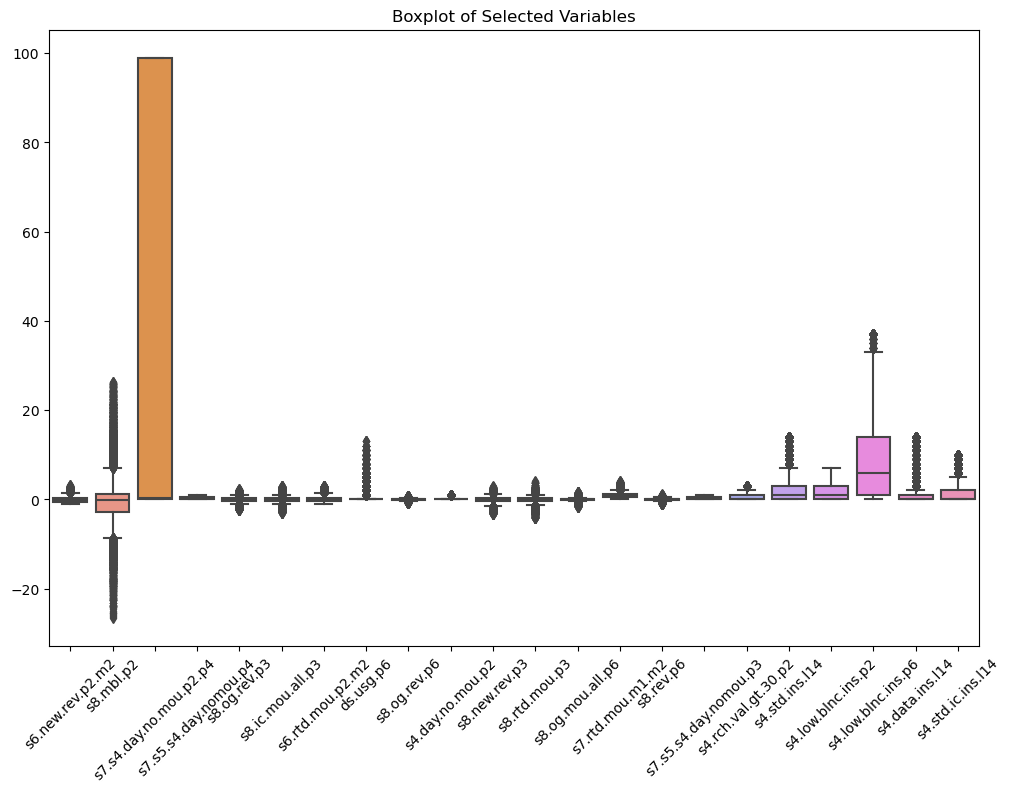

In [40]:
# Boxplot
# provides a clear overview of the distribution and variability of the selected variables, highlighting areas 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_selected.drop(columns='target'))
plt.title('Boxplot of Selected Variables')
plt.xticks(rotation=45)
plt.show()

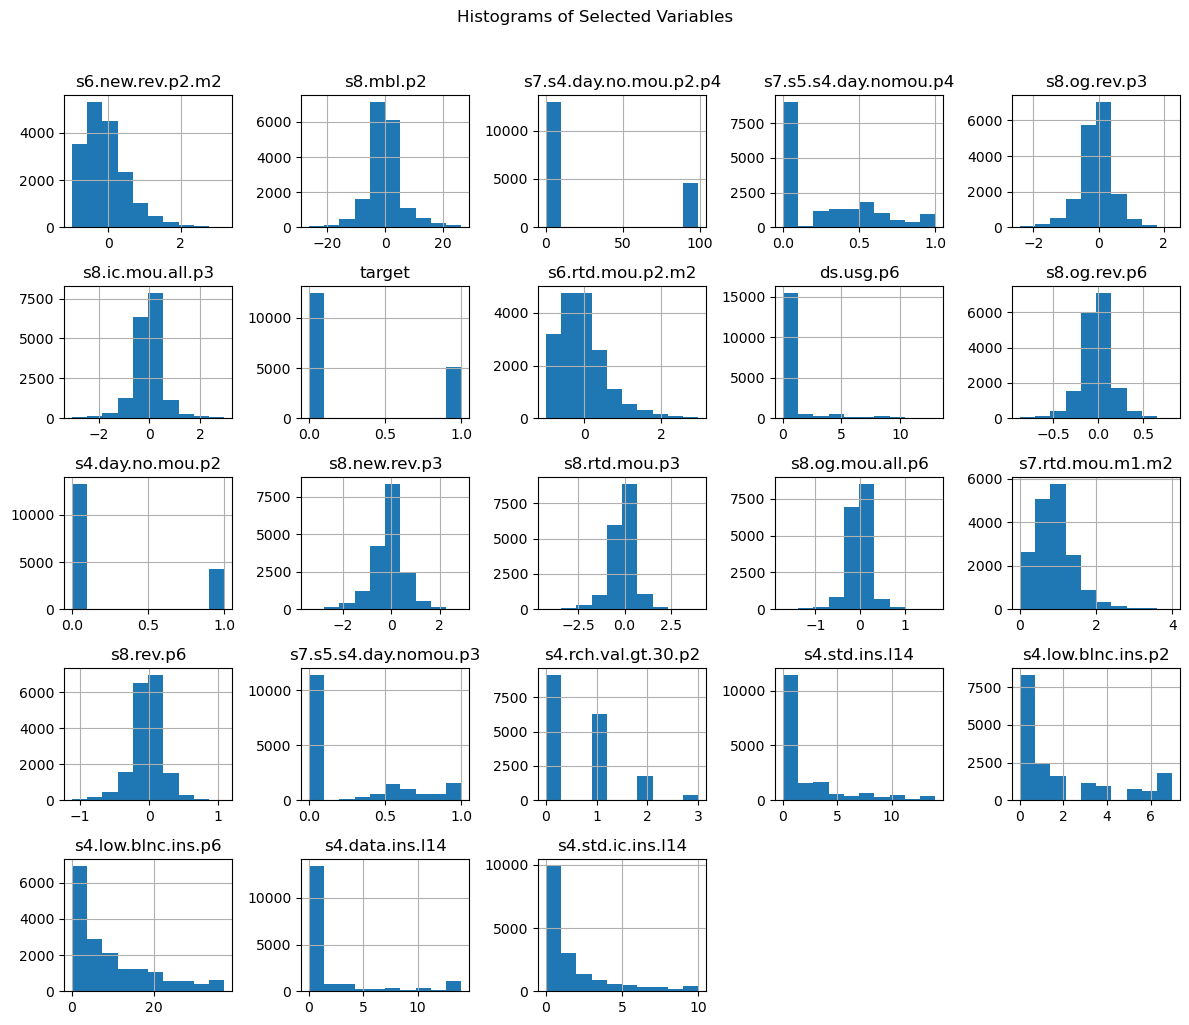

In [41]:
# Histograms
df_selected.hist(figsize=(12, 10))
plt.suptitle('Histograms of Selected Variables', x=0.5, y=1.02)
plt.tight_layout()
plt.show()

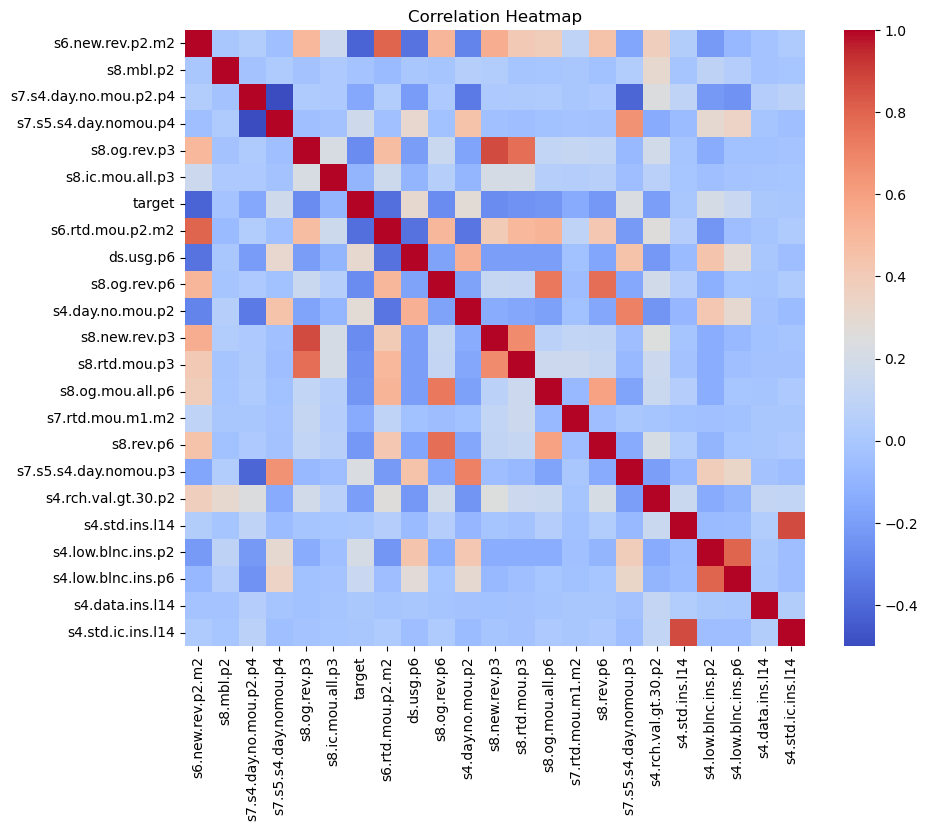

In [42]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# Count the occurrence of each value in the 'target' column
value_counts = df['target'].value_counts()

# Calculate the percentage of each value
percentage = (value_counts / len(df)) * 100

# Print the results
print("Percentage of customers who have not churned (0): {:.2f}%".format(percentage[0]))
print("Percentage of customers who have churned (1): {:.2f}%".format(percentage[1]))

Percentage of customers who have not churned (0): 71.11%
Percentage of customers who have churned (1): 28.89%


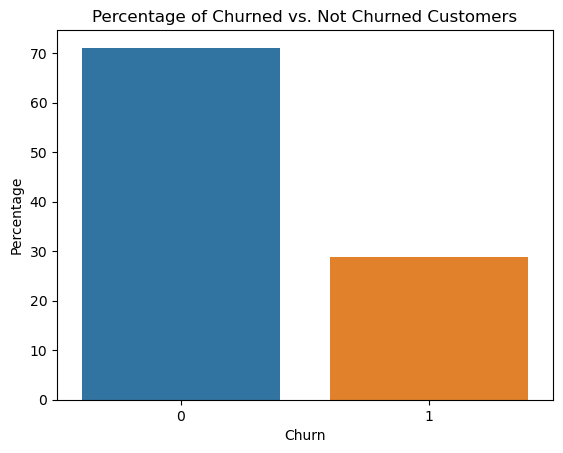

In [44]:
# Visualize the distribution with a bar plot
sns.barplot(x=percentage.index, y=percentage)
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage of Churned vs. Not Churned Customers')
plt.show()

### Input & Output Creation

In [45]:
ip = df.drop('target',axis=1)
op = df.target

In [46]:
ip.head()

,s6.new.rev.p2.m2,s8.mbl.p2,s7.s4.day.no.mou.p2.p4,s7.s5.s4.day.nomou.p4,s8.og.rev.p3,s8.ic.mou.all.p3,s6.rtd.mou.p2.m2,ds.usg.p6,s8.og.rev.p6,s4.day.no.mou.p2,s8.new.rev.p3,s8.rtd.mou.p3,s8.og.mou.all.p6,s7.rtd.mou.m1.m2,s8.rev.p6,s7.s5.s4.day.nomou.p3,s4.rch.val.gt.30.p2,s4.std.ins.l14,s4.low.blnc.ins.p2,s4.low.blnc.ins.p6,s4.data.ins.l14,s4.std.ic.ins.l14
0,-0.76,-0.72,1.000000,0.666667,-0.60,-0.73,-0.71,1.0,-0.13,1.0,-0.90,-0.50,-0.11,0.240533,-0.12,0.666667,0.0,0,6,9,0,0.0
1,-0.98,-0.08,0.500000,0.583333,-0.14,0.00,-0.96,0.0,-0.15,1.0,-0.14,-0.11,-0.13,0.459725,-0.22,0.700000,0.0,0,7,23,0,0.0
4,-0.97,-0.04,0.222222,0.777778,-0.67,-1.04,-0.98,0.0,0.01,1.0,-0.67,-0.63,-0.02,1.728186,0.01,0.750000,0.0,1,0,20,2,1.0
6,2.41,2.91,0.187500,0.937500,1.26,-0.42,2.24,0.0,0.13,1.0,1.74,1.05,0.11,1.540984,0.13,1.000000,1.0,1,5,13,0,1.0
7,0.65,15.28,0.000000,0.000000,0.29,0.03,-0.20,0.0,0.17,0.0,1.20,-0.49,0.40,0.122786,0.24,0.000000,2.0,14,0,2,0,1.0


In [47]:
op.head()

0    1
1    1
4    0
6    0
7    0
Name: target, dtype: int64

#### Splitting the dataset

In [48]:
x_train,x_test,y_train,y_test = train_test_split(ip,op,train_size=0.8, random_state=42)

In [49]:
#standard scaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### ML Model

### Decesion Tree

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
dt_prediction = dt_model.predict(x_test)
dt_prediction

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
# Calculate the accuracy of the Decision Tree model on the test data
dt_accuracy = accuracy_score(y_test, dt_prediction)

# Print the accuracy score of the Decision Tree model
print(f"Decision Tree Accuracy: {dt_accuracy}")

# Print the classification report for the Decision Tree model's predictions
print(classification_report(y_test, dt_prediction))

Decision Tree Accuracy: 0.7022424070394551
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2511
           1       0.48      0.51      0.49      1012

    accuracy                           0.70      3523
   macro avg       0.64      0.64      0.64      3523
weighted avg       0.71      0.70      0.70      3523



#### Confusion Matrix

In [53]:
cm = confusion_matrix(dt_prediction,y_test)
cm

array([[1962,  500],
       [ 549,  512]], dtype=int64)

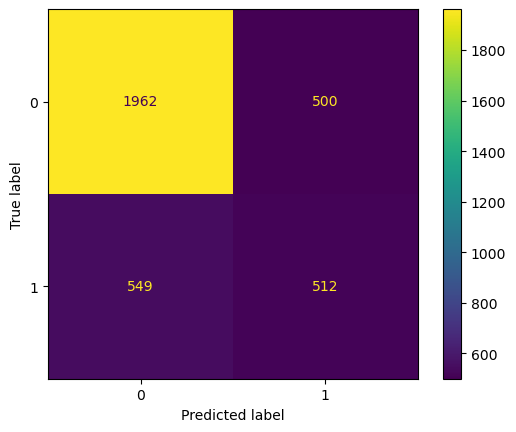

In [54]:
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

### hyperparameter tuning 

In [55]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV with the Decision Tree model, parameter grid, 5-fold cross-validation, and accuracy scoring
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_dt.fit(x_train, y_train)

# Get the best estimator (model) from the grid search
best_dt_model = grid_search_dt.best_estimator_

# Predict the test data using the best model
dt_predictions_best = best_dt_model.predict(x_test)

# Calculate the accuracy of the best model on the test data
best_dt_accuracy = accuracy_score(y_test, dt_predictions_best)

# Print the best accuracy score
print(f"Best Decision Tree Accuracy: {best_dt_accuracy}")

# Print the classification report for the best model's predictions
print(classification_report(y_test, dt_predictions_best))

Best Decision Tree Accuracy: 0.7785977859778598
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2511
           1       0.65      0.49      0.56      1012

    accuracy                           0.78      3523
   macro avg       0.73      0.69      0.71      3523
weighted avg       0.77      0.78      0.77      3523



#### ROC Curve

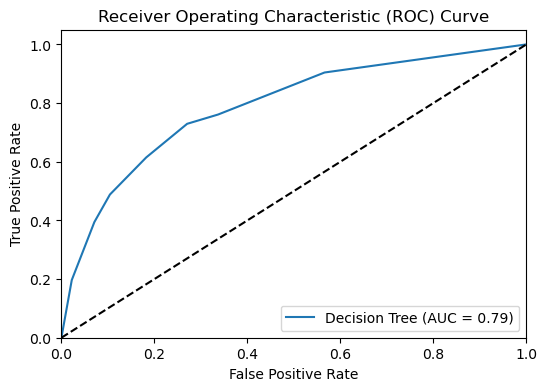

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming dt_prob and y_test are already defined
# Predict the probabilities for the positive class (class 1) using the best model
dt_prob = best_dt_model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob)

# Calculate the area under the ROC curve (AUC)
dt_roc_auc = roc_auc_score(y_test, dt_prob)
plt.figure(figsize=(6, 4))

# Plot the ROC curve with fpr on the x-axis and tpr on the y-axis, and label it with the AUC score
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_roc_auc:.2f})')

# Plot configuration
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# Display the plot
plt.show()

### Logistic Regression

In [57]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [58]:
lr_prediction = lr_model.predict(x_test)
lr_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
# Calculate the accuracy of the Logistic Regression model on the test data
lr_accuracy = accuracy_score(y_test, lr_prediction)

# Print the accuracy score of the Logistic Regression model
print(f"Logistic Regression Accuracy: {lr_accuracy}")

# Print the classification report for the Logistic Regression model's predictions
print(classification_report(y_test, lr_prediction))

Logistic Regression Accuracy: 0.786829406755606
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2511
           1       0.69      0.47      0.56      1012

    accuracy                           0.79      3523
   macro avg       0.75      0.69      0.71      3523
weighted avg       0.78      0.79      0.77      3523



#### Confusion Matrix

In [60]:
cm1 = confusion_matrix(lr_prediction,y_test)
cm1

array([[2296,  536],
       [ 215,  476]], dtype=int64)

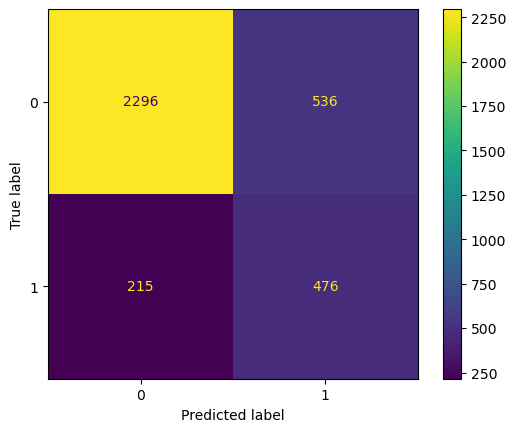

In [61]:
cmd1 = ConfusionMatrixDisplay(cm1)
cmd1.plot()
plt.show()

#### Hyperparameter Tuning

In [62]:
# Define the parameter grid for hyperparameter tuning
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize GridSearchCV with the logistic regression model, parameter grid, 5-fold cross-validation, and accuracy scoring
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_lr.fit(x_train, y_train)

# Get the best estimator (model) from the grid search
best_lr_model = grid_search_lr.best_estimator_

# Predict the test data using the best model
lr_predictions_best = best_lr_model.predict(x_test)

# Calculate the accuracy of the best model on the test data
best_lr_accuracy = accuracy_score(y_test, lr_predictions_best)

# Print the best accuracy score
print(f"Best Logistic Regression Accuracy: {best_lr_accuracy}")

# Print the classification report for the best model's predictions
print(classification_report(y_test, lr_predictions_best))

Best Logistic Regression Accuracy: 0.786829406755606
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2511
           1       0.69      0.47      0.56      1012

    accuracy                           0.79      3523
   macro avg       0.75      0.69      0.71      3523
weighted avg       0.78      0.79      0.77      3523



#### ROC Curve

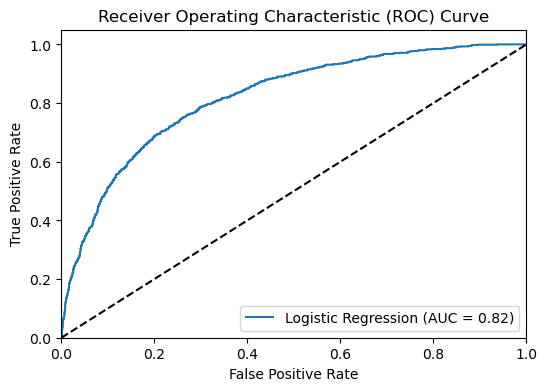

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming lr_prob and y_test are already defined
# Predict the probabilities for the positive class (class 1) using the best model
lr_prob = best_lr_model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_prob)

# Calculate the area under the ROC curve (AUC)
lr_roc_auc = roc_auc_score(y_test, lr_prob)
plt.figure(figsize=(6, 4))

# Plot the ROC curve with fpr on the x-axis and tpr on the y-axis, and label it with the AUC score
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')

# Plot configuration
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [64]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
rf_prediction = rf_model.predict(x_test)
rf_prediction

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
# Calculate the accuracy of the Random Forest Classifier model on the test data
rf_accuracy = accuracy_score(y_test, rf_prediction)

# Print the accuracy score of the Random Forest Classifier model
print(f"Random Forest Classifier Accuracy: {rf_accuracy}")

# Print the classification report for the Random Forest Classifier model's predictions
print(classification_report(y_test, rf_prediction))

Random Forest Classifier Accuracy: 0.7848424638092535
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2511
           1       0.68      0.47      0.55      1012

    accuracy                           0.78      3523
   macro avg       0.75      0.69      0.71      3523
weighted avg       0.77      0.78      0.77      3523



#### Confusion Matrix

In [67]:
cm2 = confusion_matrix(rf_prediction,y_test)
cm2

array([[2293,  540],
       [ 218,  472]], dtype=int64)

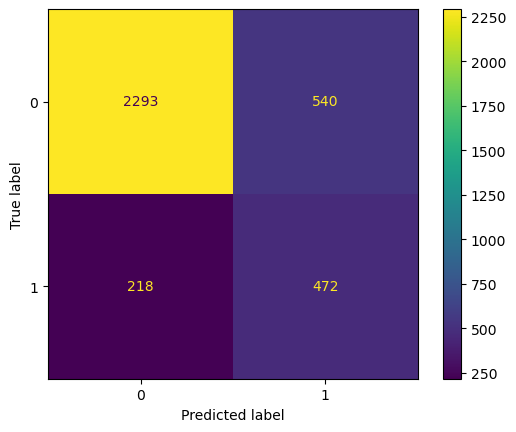

In [68]:
cmd2 = ConfusionMatrixDisplay(cm2)
cmd2.plot()
plt.show()

### Hyperparameter Tuning

In [69]:
# Define the parameter grid for hyperparameter tuning
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5, 7, 10]}

# Initialize GridSearchCV with the random forest classifier, parameter grid, 5-fold cross-validation, and accuracy scoring
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search_rf.fit(x_train, y_train)

# Get the best estimator (model) from the grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict the test data using the best model
rf_predictions_best = best_rf_model.predict(x_test)

# Calculate the accuracy of the best model on the test data
best_rf_accuracy = accuracy_score(y_test, rf_predictions_best)

# Print the best accuracy score
print(f"Best Random Forest Accuracy: {best_rf_accuracy}")

# Print the classification report for the best model's predictions
print(classification_report(y_test, rf_predictions_best))

Best Random Forest Accuracy: 0.7822878228782287
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2511
           1       0.68      0.45      0.54      1012

    accuracy                           0.78      3523
   macro avg       0.74      0.68      0.70      3523
weighted avg       0.77      0.78      0.77      3523



#### ROC Curve

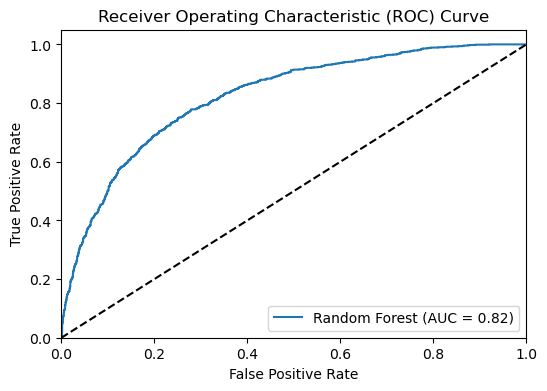

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming rf_prob and y_test are already defined
# Predict the probabilities for the positive class (class 1) using the best model
rf_prob = best_rf_model.predict_proba(x_test)[:, 1]

# Compute the false positive rate (fpr) and true positive rate (tpr) for the ROC curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)

# Calculate the area under the ROC curve (AUC)
rf_roc_auc = roc_auc_score(y_test, rf_prob)
plt.figure(figsize=(6, 4))

# Plot the ROC curve with fpr on the x-axis and tpr on the y-axis, and label it with the AUC score
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# Plot configuration
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()